In [ ]:
# conda prompt 실행  -원하는 디렉터리로 이동해서 
# cd e:7.ai
# conda create -n 사용할이름 python==3.7
# conda env list  #가상환경리스트를 조회
# conda activate 사용할이름
#(base) -> (ai)
# jupyter notebook 실행

In [2]:
!pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
     ---------------------------------------- 14.0/14.0 MB 9.9 MB/s eta 0:00:00
     ------------------------------------- 343.9/343.9 kB 20.9 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 9.9 MB/s eta 0:00:00


In [3]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm
font_loc = 'C:/Windows/Fonts/H2PORM.TTF'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 한글폰트적용시 - 깨짐방지..

In [6]:
# filename = '한국어 언어분석 통합 말뭉치.json'
# json.loads(open(filename,'r',encoding='utf-8').read())

In [5]:
import glob

In [7]:
#파일 읽기
all_files =glob.glob("./kor/*.xls")
all_files

['./kor\\myCabinetExcelData (1).xls',
 './kor\\myCabinetExcelData (2).xls',
 './kor\\myCabinetExcelData (3).xls',
 './kor\\myCabinetExcelData (4).xls',
 './kor\\myCabinetExcelData (5).xls',
 './kor\\myCabinetExcelData (6).xls',
 './kor\\myCabinetExcelData.xls']

In [13]:
all_worlds_list = [pd.read_excel(w) for w in all_files]
words_df = pd.concat(all_worlds_list)
words_df.head()

,Unnamed: 0,번호,참고문헌양식
0,NaN,NaN,NaN
1,NaN,2.0,"김수환. ""AI의 사회적 윤리 알고리즘 적용 문제에 관한 사례연구."" 국내석사학위논..."
2,NaN,3.0,"문민우. ""해상트래픽에 따른 위성 AIS 검출 성능 평가."" 국내석사학위논문 목포대..."
3,NaN,4.0,"이주환. ""AIS 데이터 메시지 형식과 사양 확장에 관한 연구."" 국내석사학위논문 ..."
4,NaN,5.0,"이학진. ""AIS자료를 활용한 VLCC항해용선 시황예측 방안에 대한 연구."" 국내석..."


In [22]:
data = words_df['참고문헌양식']
data = data.dropna()

In [26]:
data.reset_index(drop=True,inplace=True)

In [40]:
data

0      김수환. "AI의 사회적 윤리 알고리즘 적용 문제에 관한 사례연구." 국내석사학위논...
1      문민우. "해상트래픽에 따른 위성 AIS 검출 성능 평가." 국내석사학위논문 목포대...
2      이주환. "AIS 데이터 메시지 형식과 사양 확장에 관한 연구." 국내석사학위논문 ...
3      이학진. "AIS자료를 활용한 VLCC항해용선 시황예측 방안에 대한 연구." 국내석...
4      류정희. "AI에 관한 국가의 규제와 법적 수용방안 연구." 국내박사학위논문 숙명여...
                             ...                        
506    최재원 ( Choi Jaewon ). "인공지능 창작물에 대한 저작권의 주체." 문...
507    홍지은,and 이동희. "개인정보를 이용한 인공지능 알고리즘과 범죄 수사 - ‘AI...
508    김현경(Hyun-Kyung Kim). "인공지능 창작물에 대한 법적취급 차별화 방안...
509    유진현. "인공지능 시대의 문학교육을 위한 시론(試論)." 문학교육학 0.68 (2...
510    송선희,장위신,and 박혜성. "CiteSpace 기반 교육학 분야에서 AI 연구 ...
Name: 참고문헌양식, Length: 511, dtype: object

In [45]:
temp_list = []
for w in data:
    temp = re.sub(r'[^\w]',' ',w)
    temp_list.append(temp)
temp_list

['김수환   AI의 사회적 윤리 알고리즘 적용 문제에 관한 사례연구   국내석사학위논문 서울과학기술대학교  2020  서울  ',
 '문민우   해상트래픽에 따른 위성 AIS 검출 성능 평가   국내석사학위논문 목포대학교 대학원  2012  전라남도  ',
 '이주환   AIS 데이터 메시지 형식과 사양 확장에 관한 연구   국내석사학위논문 한양대학교 공학대학원  2007  서울  ',
 '이학진   AIS자료를 활용한 VLCC항해용선 시황예측 방안에 대한 연구   국내석사학위논문 한국해양대학교  2019  부산  ',
 '류정희   AI에 관한 국가의 규제와 법적 수용방안 연구   국내박사학위논문 숙명여자대학교 대학원  2022  서울  ',
 '김혜경   AI 추천시스템 기반 패션 구독 서비스 사용 의도에 관한 연구   국내박사학위논문 숭실대학교 대학원  2022  서울  ',
 '임진하   AI 교육에 대한 중 고등학생 인식조사 및 제언   국내석사학위논문 숙명여자대학교 교육대학원  2022  서울  ',
 '김동현   AI 기반 Hybrid Model을 이용한 하천유역의 홍수위 예측 및 홍수피해 위험도 평가 기법 개발   국내박사학위논문 인하대학교 대학원  2022  인천  ',
 '김지혜   Test and fault recovery strategy for systolic array based AI accelerator   국내박사학위논문 Graduate School  Yonsei University  2022  서울  ',
 '함영욱   AI 관련 발명의 성립성 판단기준에 관한 연구   국내박사학위논문 한양대학교 대학원  2022  서울  ',
 '고병철 and 한선관   인공지능교육에 대한 초등교사의 인식 조사   인공지능연구 논문지 2 1  2021   29 43   ',
 '전수진   교양교육을 위한 활동중심 인공지능 윤리 교육 사례 연구   인공지능연구 논문지 3 1  2022   30 39   ',
 '김성애 and 박주연   대학에서의 

In [48]:
# 아버지가방에들어가신다
# 아버지 명사
# 가방 명사
# 에 조사
# 들어가신 
# 다 
nlp = Okt()  # 품사 태깅   Mecab Komoran ....
word_list = []
for w in temp_list:
    word_nouns =  nlp.nouns(w) # 리스트로 반환
    word_list += word_nouns
word_list    

['김수환',
 '의',
 '사회',
 '윤리',
 '알고리즘',
 '적용',
 '문제',
 '관',
 '사례',
 '연구',
 '국내',
 '석사',
 '학위',
 '논문',
 '서울',
 '과학기술대',
 '학교',
 '서울',
 '민우',
 '해상',
 '트래픽',
 '위성',
 '검',
 '성능',
 '평가',
 '국내',
 '석사',
 '학위',
 '논문',
 '목포대학교',
 '대학원',
 '전라남도',
 '이주환',
 '데이터',
 '메시지',
 '형식',
 '사양',
 '확장',
 '관',
 '연구',
 '국내',
 '석사',
 '학위',
 '논문',
 '학교',
 '공학',
 '대학원',
 '서울',
 '이학',
 '진',
 '자료',
 '활용',
 '항해',
 '용선',
 '황',
 '예측',
 '방안',
 '대한',
 '연구',
 '국내',
 '석사',
 '학위',
 '논문',
 '한국',
 '해양',
 '대학교',
 '부산',
 '류정희',
 '관',
 '국가',
 '규제',
 '법적',
 '수용',
 '방안',
 '연구',
 '국내',
 '박사학위',
 '논문',
 '숙명여자대',
 '학교',
 '대학원',
 '서울',
 '김혜경',
 '추천',
 '시스템',
 '기반',
 '패션',
 '구독',
 '서비스',
 '사용',
 '의도',
 '관',
 '연구',
 '국내',
 '박사학위',
 '논문',
 '숭실대',
 '학교',
 '대학원',
 '서울',
 '임진',
 '교육',
 '대한',
 '중',
 '고등학생',
 '인식',
 '조사',
 '및',
 '제언',
 '국내',
 '석사',
 '학위',
 '논문',
 '숙명여자대',
 '학교',
 '교육대학',
 '서울',
 '김동현',
 '기반',
 '이용',
 '하천',
 '유역',
 '홍',
 '수위',
 '예측',
 '및',
 '홍수',
 '피해',
 '위험',
 '평가',
 '기법',
 '개발',
 '국내',
 '박사학위',
 '논문',
 '인하',
 '대학교',
 '대학원',
 '

In [55]:
count = Counter(w for w in word_list if len(str(w)) > 1)
count
#인공 과 지능 제거
del(count['인공'])
del(count['지능'])
count

Counter({'김수환': 1,
         '사회': 15,
         '윤리': 36,
         '알고리즘': 12,
         '적용': 11,
         '문제': 13,
         '사례': 12,
         '연구': 219,
         '국내': 14,
         '석사': 5,
         '학위': 5,
         '논문': 188,
         '서울': 8,
         '과학기술대': 1,
         '학교': 6,
         '민우': 1,
         '해상': 1,
         '트래픽': 1,
         '위성': 1,
         '성능': 3,
         '평가': 2,
         '목포대학교': 1,
         '대학원': 10,
         '전라남도': 1,
         '이주환': 1,
         '데이터': 26,
         '메시지': 1,
         '형식': 1,
         '사양': 1,
         '확장': 3,
         '공학': 1,
         '이학': 1,
         '자료': 2,
         '활용': 45,
         '항해': 1,
         '용선': 1,
         '예측': 12,
         '방안': 29,
         '대한': 72,
         '한국': 158,
         '해양': 1,
         '대학교': 2,
         '부산': 1,
         '류정희': 1,
         '국가': 3,
         '규제': 12,
         '법적': 21,
         '수용': 13,
         '박사학위': 5,
         '숙명여자대': 2,
         '김혜경': 1,
         '추천': 4,
         '시스템': 14

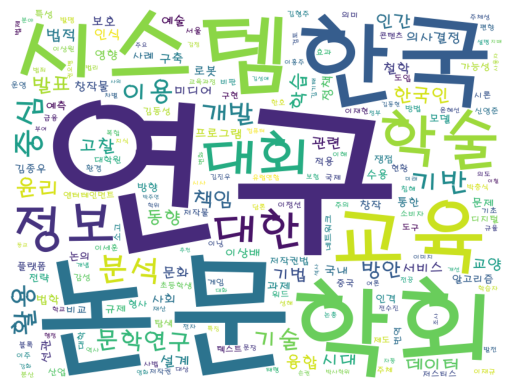

In [56]:
wc = WordCloud(font_loc ,background_color='white',width=800,height=600)
cloud = wc.generate_from_frequencies(count)
plt.imshow(cloud)
plt.axis('off')
plt.show()

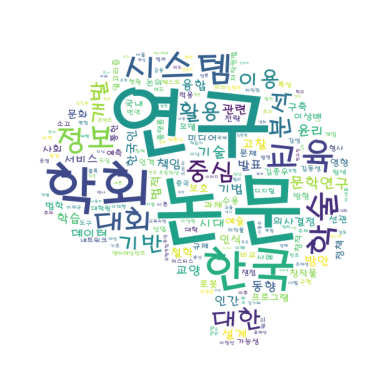

In [57]:
from PIL import Image
im = Image.open('./face2.jpg')
mask_arr = np.array(im)
wc = WordCloud(font_loc ,background_color='white',mask=mask_arr)
cloud = wc.generate_from_frequencies(count)
plt.imshow(cloud)
plt.axis('off')
plt.show()